In [1]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [5]:
TRAIN_DIR = "C:/Users/hp/Downloads/eINTERFACE_2021_Image/train"
TEST_DIR = "C:/Users/hp/Downloads/eINTERFACE_2021_Image/test"
BATCH_SIZE=64

In [6]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 1896 in folder Anger
For training data, found 1891 in folder Disgust
For training data, found 1922 in folder Fear
For training data, found 1922 in folder Happiness
For training data, found 1922 in folder Sadness
For training data, found 1922 in folder Surprise


In [7]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 237 in folder Anger
For testing data, found 237 in folder Disgust
For testing data, found 241 in folder Fear
For testing data, found 241 in folder Happiness
For testing data, found 241 in folder Sadness
For testing data, found 241 in folder Surprise


In [142]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    
    target_folder = target_dir + target_class
    

    random_image = random.sample(od.listdir(target_folder), 1)
    
    
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [170]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + r'C:\Users\hp\Downloads\eINTERFACE_2021_Image\train\Anger\18_jpg.rf.0bcb0d6d9667a17eace6abf2e690dece.jpg' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

In [171]:
import os
import random
from PIL import Image

path = 'C:/Users/hp/Downloads/eINTERFACE_2021_Image/train/Surprise'  
files = os.listdir(path)  
randomFile = random.choice(files)  
print(randomFile) 

image = Image.open(path + '/' + randomFile)  
image.show()

myvideo_frames20_jpg.rf.40007329593b4ad226662aef17cacaf7.jpg


In [9]:
class_names = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise']

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (128, 128),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (128, 128),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 11475 images belonging to 6 classes.
Found 1438 images belonging to 6 classes.


In [13]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 6, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [15]:
history = classifier.fit(training_set,
                         epochs = 20,
                         validation_data = test_set)


classifier.save('model1.h5')  

Epoch 1/20
180/180 [==============================] - 681s 4s/step - loss: 1.7999 - accuracy: 0.2166 - val_loss: 1.6653 - val_accuracy: 0.3011
Epoch 2/20
180/180 [==============================] - 458s 3s/step - loss: 1.5959 - accuracy: 0.3485 - val_loss: 1.5036 - val_accuracy: 0.3769
Epoch 3/20
180/180 [==============================] - 447s 2s/step - loss: 1.4518 - accuracy: 0.4161 - val_loss: 1.3098 - val_accuracy: 0.4604
Epoch 4/20
180/180 [==============================] - 448s 2s/step - loss: 1.3091 - accuracy: 0.4824 - val_loss: 1.1625 - val_accuracy: 0.5675
Epoch 5/20
180/180 [==============================] - 447s 2s/step - loss: 1.1803 - accuracy: 0.5373 - val_loss: 1.0841 - val_accuracy: 0.5556
Epoch 6/20
180/180 [==============================] - 474s 3s/step - loss: 1.0826 - accuracy: 0.5780 - val_loss: 1.0241 - val_accuracy: 0.5876
Epoch 7/20
180/180 [==============================] - 463s 3s/step - loss: 1.0109 - accuracy: 0.6066 - val_loss: 0.9252 - val_accuracy: 0.6530

In [16]:
classifier.evaluate(test_set)

23/23 [==============================] - 26s 1s/step - loss: 0.5121 - accuracy: 0.8178


[0.5120704770088196, 0.8178024888038635]

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plr.xlabel('epochs')
plt.ylabel('Loss')

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plr.xlabel('epochs')
plt.ylabel('Accuracy')

In [20]:
model_path = "model1.h5"
loaded_model = keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

image = cv2.imread("C:/Users/hp/Downloads/eINTERFACE_2021_Image/test/Happiness/myvideo_frames10_jpg.rf.62ecb6d69a614aa8f9fd0a31a942f658.jpg")

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((128, 128))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
result

3

In [18]:
training_set.class_indices

{'Anger': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happiness': 3,
 'Sadness': 4,
 'Surprise': 5}

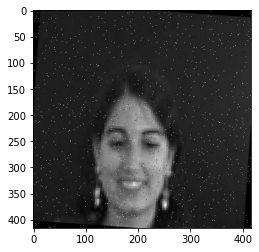

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('C:/Users/hp/Downloads/eINTERFACE_2021_Image/test/Happiness/myvideo_frames10_jpg.rf.62ecb6d69a614aa8f9fd0a31a942f658.jpg')
imgplot = plt.imshow(img)
plt.show()